In [1]:
import math
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

/home/hp/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
def show_image(img):
    plt.imshow(img, cmap='gray')
    plt.title("IMAGE")
    plt.axis('off')
    plt.show()

# Shape Detection

3
shape Traingle area 13326.5 perimeter 537.345233798027 approx_vertices 3 bbox 1383 587 170 149 centroid 1467 684
3
shape Traingle area 10258.0 perimeter 479.78888487815857 approx_vertices 3 bbox 1392 597 153 134 centroid 1467 685
4
shape Rectangle area 68161.0 perimeter 1084.8284270763397 approx_vertices 4 bbox 365 573 347 198 centroid 537 671
4
shape Rectangle area 62643.0 perimeter 1041.6568541526794 approx_vertices 4 bbox 370 578 336 188 centroid 537 671
5
shape pentagon area 20620.0 perimeter 568.7005722522736 approx_vertices 5 bbox 453 587 171 171 centroid 537 679
5
shape pentagon area 17067.0 perimeter 521.3868639469147 approx_vertices 5 bbox 459 594 158 158 centroid 537 680
6
cirluar :  0.8324880391781251
Lenght of cont 794
Ratio: 1.0182950768244214
shape Ploygonal-6 area 55157.0 perimeter 912.4650719165802 approx_vertices 6 bbox 1111 536 251 291 centroid 1236 681
6
cirluar :  0.826833981272455
Lenght of cont 752
Ratio: 1.005630679979785
shape Ploygonal-6 area 49571.0 perimete

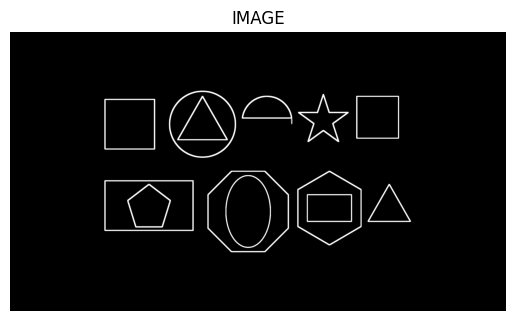

Length 28


In [8]:
img = cv.imread("image.png")
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
blur = cv.GaussianBlur(gray,(7,7),0.4)
sx = cv.Sobel(blur,cv.CV_64F,1,0,None,5)
sy = cv.Sobel(blur,cv.CV_64F,0,1,None,5)
mag = cv.magnitude(sx,sy)
mag = cv.convertScaleAbs(mag,cv.CV_8U)
#can = cv.Canny(blur,50,150,None,3,False)
#mag = cv.threshold(mag,0,255,cv.THRESH_BINARY)

cont,_ = cv.findContours(mag,cv.RETR_TREE,cv.CHAIN_APPROX_NONE)

result = []
for con in cont:
    
    area = cv.contourArea(con)

    if area < 400 :
        continue

    peri = cv.arcLength(con,True)
    epl = 0.04 * peri
    approx = cv.approxPolyDP(con,epl,True)

    print(len(approx))
    vertices = len(approx)
    x,y,w,h = cv.boundingRect(con)

    if vertices == 3:
        shape = "Traingle"
    elif vertices == 4:

        aspect_ratio = w / h 
        if 0.95 <= aspect_ratio <= 1.05:
            shape = "Square"
        else:
            shape = "Rectangle"

    elif vertices == 5:
        shape = "pentagon"

    else:
        cirluar = 4 * np.pi * (area/(peri*peri))
        print("cirluar : ",cirluar)
        if cirluar >= 0.88:
            shape = "Cricle"
        else:
            if len(con) >= 5:
                print("Lenght of cont",len(con))
                (dx,dy),(Ma,mi),ang = cv.fitEllipse(con)
                ratio = max(Ma,mi)/min(Ma,mi)
                print("Ratio:",ratio)
                if ratio >= 1.15:
                    shape = "Oval"
                else:
                    shape = f"Ploygonal-{vertices}"

    # compute centroid for placing label
    M = cv.moments(con)
    cx = int(M['m10']/M['m00']) if M['m00'] != 0 else x + w//2
    cy = int(M['m01']/M['m00']) if M['m00'] != 0 else y + h//2


        # draw contour and label
    cv.drawContours(img, [con], -1, (0,255,0), 2)
    label = f"{shape}"
    cv.putText(img, label, (cx-40, cy), cv.FONT_HERSHEY_SIMPLEX, 2, (255,0,0), 1, cv.LINE_AA)

    
    result.append({
            "shape": shape,
            "area": area,
            "perimeter": peri,
            "approx_vertices": vertices,
            "bbox":(x,y,w,h),
            "centroid":(cx,cy)
    })
    #show_image(img)

    print(
            "shape", shape,
            "area", area,
            "perimeter", peri,
            "approx_vertices",vertices,
            "bbox",x,y,w,h,
            "centroid",cx,cy)
cv.imshow("Image",mag)
cv.waitKey(0)
show_image(mag)
print("Length",len(cont))

        



# Semi Cricle 

solidity = 0.7945130315500686 Aspect Ratio = 1.9444444444444444 
 x, Y, W, H 802 459 315 162 
 Area = 40544.0
Shape =  Semicircle


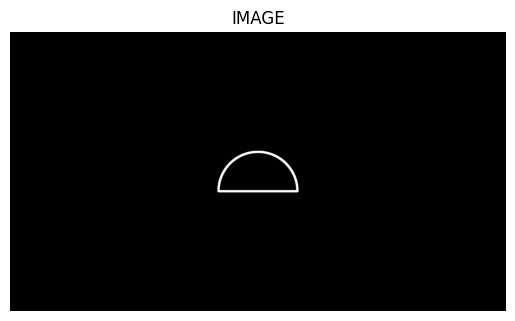

In [ ]:

img = cv.imread('semi-cricle.png') 
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
blur = cv.GaussianBlur(gray, (5, 5), 0)
# _, thresh = cv.threshold(blur, 10, 255, cv.THRESH_BINARY_INV) 
sx = cv.Sobel(blur,cv.CV_64F,1,0,None,5)
sy = cv.Sobel(blur,cv.CV_64F,0,1,None,5)
mag = cv.magnitude(sx,sy)
mag = cv.convertScaleAbs(mag,cv.CV_8U)

cont, _ = cv.findContours(mag, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE) 
shape = "Unknown"
for con in cont:
    area = cv.contourArea(con)

    if area < 500: 
        continue

    x, y, w, h = cv.boundingRect(con)
    
    if min(w, h) == 0:
        shape = None
        
    aspect_ratio = max(w, h) / min(w, h)
    
    # Calculate Solidity: Area of contour / Area of bounding rectangle
    solidity = area / (w * h)
    print("solidity =",solidity,"Aspect Ratio =",aspect_ratio,"\n x, Y, W, H",x,y,w,h,"\n Area =",area)
    
    # Criteria for a Semicircle:
    # 1. Aspect Ratio (max(w,h)/min(w,h)) is close to 2 (e.g., 1.8 to 2.2)
    # 2. Solidity is in the range of a semicircle (approx. 0.35 to 0.50)
    
    if (1.8 <= aspect_ratio <= 2.2) and (0.75 <= solidity <= 0.85):
        shape = "Semicircle"

    if shape == "Semicircle":
        peri = cv.arcLength(con, True)
        epsilon = 0.02 * peri
        approx = cv.approxPolyDP(con, epsilon, True)
        
        M = cv.moments(con)
        if M['m00'] != 0:
            cx = int(M['m10'] / M['m00'])
            cy = int(M['m01'] / M['m00'])
            
            cv.drawContours(img, [con], -1, (0, 255, 0), 3)
            cv.putText(img, shape, (cx - 50, cy), cv.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
    print("Shape = ",shape)solidity = 0.7945130315500686 Aspect Ratio = 1.9444444444444444 
 x, Y, W, H 802 459 315 162 
 Area = 40544.0
show_image(mag)


In [3]:
import cv2 as cv
import numpy as np

def detect_shape(con, area, peri):
    epsilon = 0.04 * peri
    approx = cv.approxPolyDP(con, epsilon, True)

    vertices = len(approx)
    x, y, w, h = cv.boundingRect(con)
    cirluar = 0
    ratio = 0
    
    if vertices == 3:
        shape = "Triangle"
    
    elif vertices == 4:
        aspect_ratio = w / h 
        if 0.95 <= aspect_ratio <= 1.05:
            shape = "Square"
        else:
            shape = "Rectangle"
    
    elif vertices == 5:
        shape = "Pentagon"
    
    else:
        if peri > 0:
            cirluar = 4 * np.pi * (area / (peri * peri))
        
        if cirluar >= 0.88:
            shape = "Circle"
        else:
            if len(con) >= 5:
                (dx, dy), (Ma, mi), ang = cv.fitEllipse(con)
                if min(Ma, mi) > 0:
                    ratio = max(Ma, mi) / min(Ma, mi)
                
                if ratio >= 1.15:
                    shape = "Oval"
                else:
                    shape = f"Polygon-{vertices}"
            else:
                shape = f"Polygon-{vertices}"

    M = cv.moments(con)
    if M['m00'] != 0:
        cx = int(M['m10'] / M['m00'])
        cy = int(M['m01'] / M['m00'])
    else:
        cx = x + w // 2
        cy = y + h // 2

    
    return shape, cx, cy



cap = cv.VideoCapture(0) 

while True:
    ret, frame = cap.read()
    if not ret:
        print("Error: Failed to capture frame.")
        break
        
    img = frame.copy() 

    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    blur = cv.GaussianBlur(gray, (3,3), 0.2)
    can = cv.Canny(blur, 100, 200, None, 3, False)
    

    cont, hier = cv.findContours(can, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE) 
    count = 1
    result = {}
    for con in cont:
        area = cv.contourArea(con)

        if area < 400:
            continue

        peri = cv.arcLength(con, True)
        
        shape, cx, cy = detect_shape(con, area, peri)

        cv.drawContours(img, [con], -1, (0, 255, 0), 2)
        label = f"{shape}"
        
        cv.putText(img, label, (cx - 40, cy), cv.FONT_HERSHEY_SIMPLEX, 0.7, (255, 0, 0), 2, cv.LINE_AA)
        
        count += 1
        
        

    cv.imshow('Live Shape Detection', img)
    cv.imshow('Canny Edges', can)

    if cv.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv.destroyAllWindows()

qt.qpa.plugin: Could not find the Qt platform plugin "wayland" in "/home/hp/.local/lib/python3.10/site-packages/cv2/qt/plugins"


# SSTTOOPP

In [ ]:
import cv2 as cv
import numpy as np

def detect_shape(con, area, peri):
    epsilon = 0.04 * peri
    approx = cv.approxPolyDP(con, epsilon, True)

    vertices = len(approx)
    x, y, w, h = cv.boundingRect(con)
    cirluar = 0
    ratio = 0
    
    if vertices == 3:
        shape = "Triangle"
    
    elif vertices == 4:
        aspect_ratio = w / h 
        if 0.95 <= aspect_ratio <= 1.05:
            shape = "Square"
        else:
            shape = "Rectangle"
    
    elif vertices == 5:
        shape = "Pentagon"
    
    else:
        if peri > 0:
            cirluar = 4 * np.pi * (area / (peri * peri))
        
        if cirluar >= 0.88:
            shape = "Circle"
        else:
            if len(con) >= 5:
                (dx, dy), (Ma, mi), ang = cv.fitEllipse(con)
                if min(Ma, mi) > 0:
                    ratio = max(Ma, mi) / min(Ma, mi)
                
                if ratio >= 1.15:
                    shape = "Oval"
                else:
                    shape = f"Polygon-{vertices}"
            else:
                shape = f"Polygon-{vertices}"

    M = cv.moments(con)
    if M['m00'] != 0:
        cx = int(M['m10'] / M['m00'])
        cy = int(M['m01'] / M['m00'])
    else:
        cx = x + w // 2
        cy = y + h // 2

    bbox = (x, y, w, h)
    centroid = (cx, cy)
    return shape, area, peri, bbox, centroid

# cap = cv.VideoCapture(0) 

# while True:
#     ret, frame = cap.read()
#     if not ret:
#         print("Error: Failed to capture frame.")
#         break
        

img = cv.imread("cricle_disc.jpg")

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
blur = cv.GaussianBlur(gray, (3,3), 0.2)
can = cv.Canny(blur, 50, 150, None, 3, False)

cont, hier = cv.findContours(can, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE) 

# List to store data for all detected contours
contour_data = []

# Dictionary to track the largest contour of each shape type
largest_shapes = {}

for i, con in enumerate(cont):
    area = cv.contourArea(con)

    if area < 400:
        continue

    peri = cv.arcLength(con, True)

    shape, area, peri, bbox, centroid = detect_shape(con, area, peri)

    # Get hierarchy for the current contour
    # hier is an array of [Next, Previous, First Child, Parent]
    hierarchy = hier[0][i] 

    # Collect data
    data = {
        "shape": shape,
        "area": area,
        "perimeter": peri,
        "bbox": bbox,
        "centroid": centroid,
        "hierarchy": hierarchy
    }
    contour_data.append(data)

    # Check for the largest shape of its type
    if shape not in largest_shapes or area > largest_shapes[shape]["area"]:
        largest_shapes[shape] = {"area": area, "data": data, "contour": con}

    # Draw contour and label on the image
    cv.drawContours(img, [con], -1, (0, 255, 0), 2)
    label = f"{shape}"
    cx, cy = centroid
    cv.putText(img, label, (cx - 40, cy), cv.FONT_HERSHEY_SIMPLEX, 0.7, (255, 0, 0), 2, cv.LINE_AA)

        # --- Output Analysis ---
    print("-" * 50)
    print("ALL DETECTED SHAPES (Shape, Area):")
    for data in contour_data:
        print(f"  {data['shape']:<15} Area: {data['area']:<10.2f} Perimeter: {data['perimeter']:.2f} BBox: {data['bbox']} Centroid: {data['centroid']} Hier: {data['hierarchy']}")

    print("\nLARGEST SHAPE OF EACH TYPE:")
    for shape_type, info in largest_shapes.items():
        print(f"  Largest {shape_type:<10}: Area: {info['area']:.2f} BBox: {info['data']['bbox']}")
        
        # Optionally highlight the largest shape on the image
    # cv.drawContours(img, [info['contour']], -1, (0, 0, 255), 4) # Uncomment to highlight

cv.imshow('Live Shape Detection', img)
cv.imshow('Canny Edges', can)

# if cv.waitKey(1) & 0xFF == ord('q'):
#     break

cv.waitKey(0)
cv.destroyAllWindows()

--------------------------------------------------
ALL DETECTED SHAPES (Shape, Area):
  Polygon-8       Area: 36127.00   Perimeter: 724.52 BBox: (4, 5, 216, 216) Centroid: (111, 112) Hier: [-1 -1  1 -1]

LARGEST SHAPE OF EACH TYPE:
  Largest Polygon-8 : Area: 36127.00 BBox: (4, 5, 216, 216)
--------------------------------------------------
ALL DETECTED SHAPES (Shape, Area):
  Polygon-8       Area: 36127.00   Perimeter: 724.52 BBox: (4, 5, 216, 216) Centroid: (111, 112) Hier: [-1 -1  1 -1]
  Square          Area: 35924.00   Perimeter: 892.69 BBox: (4, 5, 216, 216) Centroid: (111, 112) Hier: [-1  2  4  0]

LARGEST SHAPE OF EACH TYPE:
  Largest Polygon-8 : Area: 36127.00 BBox: (4, 5, 216, 216)
  Largest Square    : Area: 35924.00 BBox: (4, 5, 216, 216)
--------------------------------------------------
ALL DETECTED SHAPES (Shape, Area):
  Polygon-8       Area: 36127.00   Perimeter: 724.52 BBox: (4, 5, 216, 216) Centroid: (111, 112) Hier: [-1 -1  1 -1]
  Square          Area: 35924.00   P

: 